## Data Descriptions

### Kidney Disease Dataset

Predicting Chronic Kidney Disease based on health records.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

**Problem Statement :** Classify whether the patients have "Classification" column 'ckd' or 'notckd'. This means whether the patient has kidney disorder or not.

In [1]:
# Importing the dataset and libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kidney_df = pd.read_csv('assignment_kidney_disease_DTRF.csv')

In [3]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


** There are 26 columns **

In [4]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

## Perform feature engineering on the columns to remove all the categorical columns and object datatype columns

** There are a lot of object data types. We need to convert them to numeric before any further processing **

In [5]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

** These columns have numerical values but have object dtype **

In [6]:
#These columns have \t? values

kidney_df.drop(kidney_df.index[[66,214,185, 133, 162]], inplace=True)

In [7]:
kidney_df[['pcv','wc','rc']] = kidney_df[['pcv','wc','rc']].apply(pd.to_numeric)

** These columns are categorical **

In [8]:
kidney_df[['htn','dm','cad','pe','ane']] = kidney_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_df['dm'] = kidney_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney_df['cad'] = kidney_df['cad'].replace(to_replace='\tno',value=0)

kidney_df[['rbc','pc']] = kidney_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_df[['pcc','ba']] = kidney_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

kidney_df[['appet']] = kidney_df[['appet']].replace(to_replace={'good':1,'poor':0})  #,'no':np.nan
kidney_df['classification'] = kidney_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0})  #,'no':0.0
kidney_df.rename(columns={'classification':'class'},inplace=True)

In [9]:
kidney_df['pe'] = kidney_df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney_df['appet'] = kidney_df['appet'].replace(to_replace='no',value=0)

# Dropping the index column
kidney_df.drop('id',axis=1,inplace=True)

In [10]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 25 columns):
age      386 non-null float64
bp       384 non-null float64
sg       349 non-null float64
al       350 non-null float64
su       347 non-null float64
rbc      246 non-null float64
pc       331 non-null float64
pcc      391 non-null float64
ba       391 non-null float64
bgr      351 non-null float64
bu       376 non-null float64
sc       378 non-null float64
sod      309 non-null float64
pot      308 non-null float64
hemo     344 non-null float64
pcv      325 non-null float64
wc       291 non-null float64
rc       267 non-null float64
htn      393 non-null float64
dm       393 non-null float64
cad      393 non-null float64
appet    394 non-null float64
pe       394 non-null float64
ane      394 non-null float64
class    395 non-null float64
dtypes: float64(25)
memory usage: 80.2 KB


** Now we have converted all the object columns in float64 **

## Question: Remove missing values from the data frame

In [11]:
kidney_df.isnull().sum()

age        9
bp        11
sg        46
al        45
su        48
rbc      149
pc        64
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      51
pcv       70
wc       104
rc       128
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

# As there are more missing values in rbc, wc & rc we will drop it

In [12]:
kidney_df.drop(['rbc','wc','rc'],axis=1,inplace=True)
kidney_df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.0,36.0,...,NaN,15.4,44.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,NaN,18.0,...,NaN,11.3,38.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.0,53.0,...,NaN,9.6,31.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.0,56.0,...,2.5,11.2,32.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.0,26.0,...,NaN,11.6,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
# now replacing everything with mean for nan values
kidney_df = kidney_df.fillna(kidney_df.mean())

In [14]:
# check whether missing values are replaced or not
kidney_df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [15]:
kidney_df.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,51.455959,76.432292,1.017407,1.008571,0.455331,0.226586,0.107417,0.056266,148.031339,57.479255,...,4.628247,12.534012,38.898462,0.368957,0.340967,0.086514,0.791878,0.190355,0.152284,0.620253
std,16.845351,13.500540,0.005397,1.269492,1.034994,0.383697,0.308461,0.229556,75.138023,49.416675,...,2.837424,2.728991,8.195215,0.481909,0.473432,0.280765,0.405964,0.392581,0.359296,0.485939
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,...,2.500000,3.100000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,27.000000,...,4.000000,10.850000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.017407,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,44.000000,...,4.628247,12.534012,38.898462,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.455331,0.226586,0.000000,0.000000,149.015670,62.500000,...,4.800000,14.700000,44.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,...,47.000000,17.800000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Question : Perform EDA and find any correlation

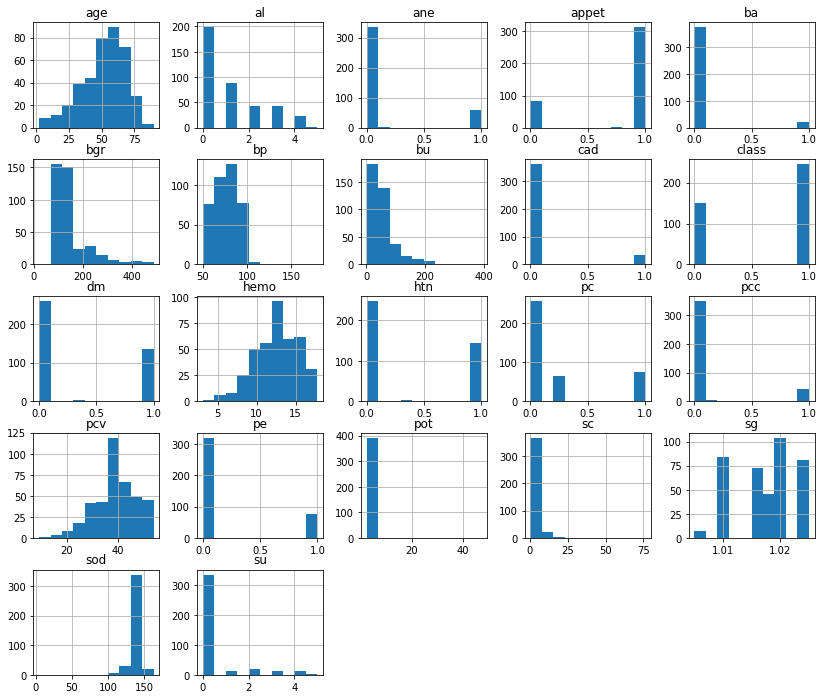

In [16]:
kidney_df.hist(bins=10,figsize=(14,12))
plt.show()

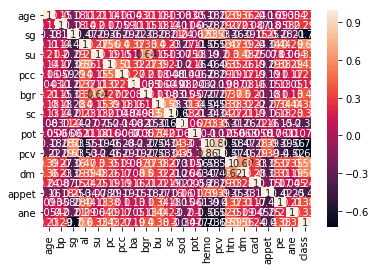

In [17]:
sns.heatmap(kidney_df.corr(),annot=True)
plt.show()

## Question: Perform classification using Decision Tree algorithm and explain the performance

In [18]:
x = kidney_df.drop(['class'],axis=1)
y = kidney_df['class']

In [19]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=21)

F:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',random_state=45)

In [21]:
tree.fit(x_train,y_train)
pred = tree.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
confusion_matrix(y_test,pred)

array([[39,  1],
       [ 1, 58]], dtype=int64)

In [24]:
accuracy_score(y_test,pred)

0.9797979797979798

In [25]:
cr = classification_report(y_test,pred)
print(cr)

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97        40
        1.0       0.98      0.98      0.98        59

avg / total       0.98      0.98      0.98        99



Recall should be greater than precision

TN = 39

TP = 58

FP = 1

FN = 1

precision for class 1 is TP/(TP+FP) = 58/(58+1) = 0.983

Recall for class 1 is TP/(TP+FN) = 58/(58+1) = 0.983

Here precision and recall have same accuracy score. So what should be do here

## Question: Perform classification using Random Forest and explain the metrics

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=122)
forest.fit(x_train,y_train)
pred_rf = forest.predict(x_test)

In [27]:
confusion_matrix(y_test,pred_rf)

array([[40,  0],
       [ 0, 59]], dtype=int64)

In [28]:
accuracy_score(y_test,pred_rf)

1.0

In [29]:
cr = classification_report(y_test,pred_rf)
print(cr)

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        40
        1.0       1.00      1.00      1.00        59

avg / total       1.00      1.00      1.00        99



TP = 59

TN = 40

FP = 0

FN = 0

precision = TP/(TP+FP) = 59/59 = 1

Recall = TP/(TP+FN) = 59/59 = 1

The accuracy has been increased for Random forest compared to Decision Tree, but both the models of precision and recall are
same. Now

RF Model - 40 people doesn't have ckd disease & 59 people have ckd disease (precision & recall have 1)

DT Model - 40 people doesn't have ckd disease & 59 people have ckd disease (precision & recall have 0.983)

# The End